In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import seaborn as sns

Importing the data

In [35]:
df = pd.read_csv('ai4i2020.csv')
# print first 5 rows
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [36]:
# update column names
df.columns =  df.columns.str.replace(' ','_')
df.columns =  df.columns.str.replace(r'\[','', regex=True)
df.columns =  df.columns.str.replace(r'\]','', regex=True)
df

,UDI,Product_ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


## Data Preprocessing
### checking for missing values and finding missing values 

In [37]:
print(df.dtypes)
# ignoring product_id
df['Type'].unique()
df.isnull().sum()

UDI                        int64
Product_ID                object
Type                      object
Air_temperature_K        float64
Process_temperature_K    float64
Rotational_speed_rpm       int64
Torque_Nm                float64
Tool_wear_min              int64
Machine_failure            int64
TWF                        int64
HDF                        int64
PWF                        int64
OSF                        int64
RNF                        int64
dtype: object


UDI                      0
Product_ID               0
Type                     0
Air_temperature_K        0
Process_temperature_K    0
Rotational_speed_rpm     0
Torque_Nm                0
Tool_wear_min            0
Machine_failure          0
TWF                      0
HDF                      0
PWF                      0
OSF                      0
RNF                      0
dtype: int64

No null values, proceeding further

In [38]:
# replace type with integers since its categorical , can do One-hot encoding and apply column transformation.
df.replace(['L', 'M', 'H'], [1, 2, 3], inplace=True)
df.head()

,UDI,Product_ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


Data set is clean and there are no missing values

In [39]:
# Describing about data
df.describe()

,UDI,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,1.500300,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,0.671301,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,1.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,1.000000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,1.000000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,2.000000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,3.000000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [40]:
# format data for classification
X = df.drop(['UDI','Machine_failure', 'Product_ID'], axis=1).copy()
# X = df.drop(['UDI','Machine_failure', 'Product_ID', 'TWF','HDF','PWF','OSF','RNF'], axis=1).copy()
X.head()

,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,TWF,HDF,PWF,OSF,RNF
0,2,298.1,308.6,1551,42.8,0,0,0,0,0,0
1,1,298.2,308.7,1408,46.3,3,0,0,0,0,0
2,1,298.1,308.5,1498,49.4,5,0,0,0,0,0
3,1,298.2,308.6,1433,39.5,7,0,0,0,0,0
4,1,298.2,308.7,1408,40.0,9,0,0,0,0,0


should we need to check for outliers?

In [41]:
y = df['Machine_failure'].copy()
y.head()
y.value_counts()

0    9661
1     339
Name: Machine_failure, dtype: int64

### Build a Classification tree

In [42]:
# split data set to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
init_dtree = DecisionTreeClassifier(random_state=42)
init_dtree = init_dtree.fit(X_train, y_train)

[Text(0.8028846153846154, 0.9615384615384616, 'HDF <= 0.5\ngini = 0.069\nsamples = 7500\nvalue = [7233, 267]\nclass = fail 1'),
 Text(0.7644230769230769, 0.8846153846153846, 'OSF <= 0.5\ngini = 0.046\nsamples = 7407\nvalue = [7233, 174]\nclass = fail 1'),
 Text(0.7259615384615384, 0.8076923076923077, 'PWF <= 0.5\ngini = 0.027\nsamples = 7335\nvalue = [7233, 102]\nclass = fail 1'),
 Text(0.6875, 0.7307692307692307, 'TWF <= 0.5\ngini = 0.011\nsamples = 7272\nvalue = [7233, 39]\nclass = fail 1'),
 Text(0.6490384615384616, 0.6538461538461539, 'Rotational_speed_rpm <= 1439.5\ngini = 0.002\nsamples = 7240\nvalue = [7233, 7]\nclass = fail 1'),
 Text(0.4519230769230769, 0.5769230769230769, 'Rotational_speed_rpm <= 1437.5\ngini = 0.005\nsamples = 2095\nvalue = [2090, 5]\nclass = fail 1'),
 Text(0.28846153846153844, 0.5, 'Tool_wear_min <= 209.5\ngini = 0.003\nsamples = 2054\nvalue = [2051, 3]\nclass = fail 1'),
 Text(0.15384615384615385, 0.4230769230769231, 'Air_temperature_K <= 301.85\ngini = 0

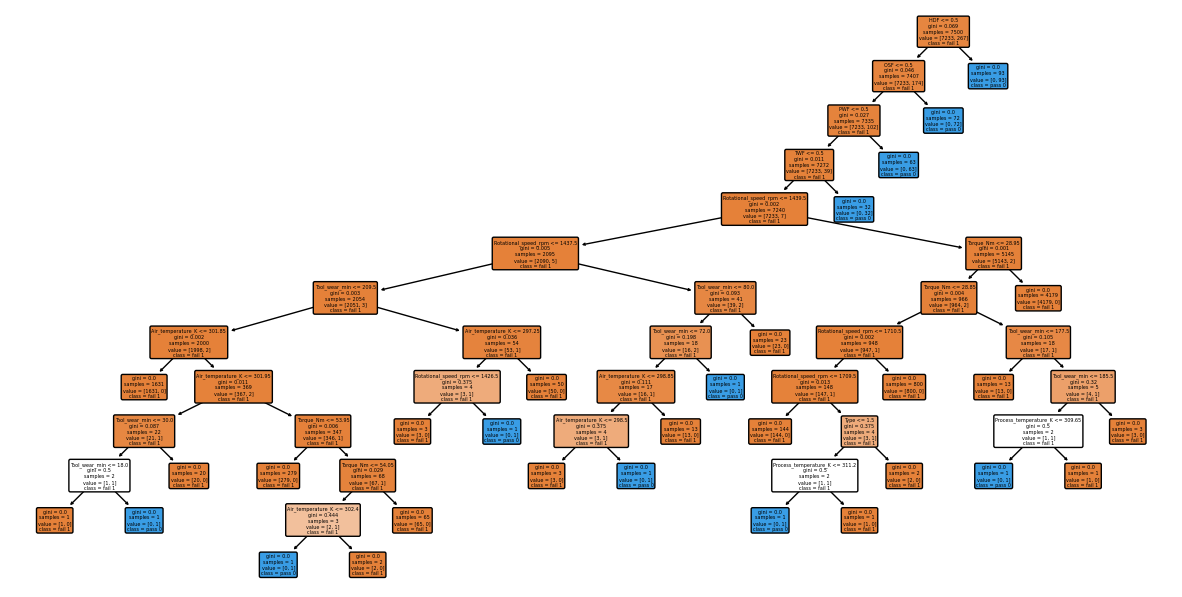

In [43]:
plt.figure(figsize=(15,7.5))
plot_tree(init_dtree, filled=True, rounded=True, class_names=['fail 1', 'pass 0'], feature_names=X.columns)

In [44]:
res = init_dtree.predict(X_test)
score = accuracy_score(res, y_test)
print('Decision Tree Accuracy:', score)

Decision Tree Accuracy: 0.9976


In [45]:
# prune the decision tree because initial decision tree is HUGE
path = init_dtree.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

pruned_dts = []
for ccp_alpha in ccp_alphas:
    pruned_dt = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    pruned_dt.fit(X_train, y_train)
    pruned_dts.append(pruned_dt)

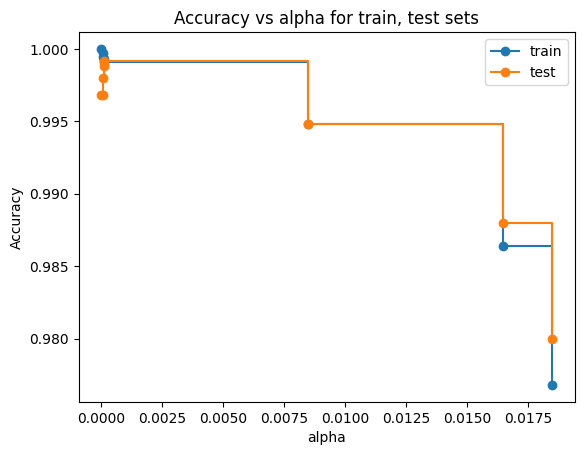

In [46]:
train_scores = [pruned_dt.score(X_train, y_train) for pruned_dt in pruned_dts]
test_scores = [pruned_dt.score(X_test, y_test) for pruned_dt in pruned_dts]
fig,ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for train, test sets")
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [67]:
final_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0075)
final_dt = final_dt.fit(X_train, y_train)

[Text(0.7142857142857143, 0.9, 'HDF <= 0.5\ngini = 0.069\nsamples = 7500\nvalue = [7233, 267]\nclass = fail 1'),
 Text(0.5714285714285714, 0.7, 'OSF <= 0.5\ngini = 0.046\nsamples = 7407\nvalue = [7233, 174]\nclass = fail 1'),
 Text(0.42857142857142855, 0.5, 'PWF <= 0.5\ngini = 0.027\nsamples = 7335\nvalue = [7233, 102]\nclass = fail 1'),
 Text(0.2857142857142857, 0.3, 'TWF <= 0.5\ngini = 0.011\nsamples = 7272\nvalue = [7233, 39]\nclass = fail 1'),
 Text(0.14285714285714285, 0.1, 'gini = 0.002\nsamples = 7240\nvalue = [7233, 7]\nclass = fail 1'),
 Text(0.42857142857142855, 0.1, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]\nclass = pass 0'),
 Text(0.5714285714285714, 0.3, 'gini = 0.0\nsamples = 63\nvalue = [0, 63]\nclass = pass 0'),
 Text(0.7142857142857143, 0.5, 'gini = 0.0\nsamples = 72\nvalue = [0, 72]\nclass = pass 0'),
 Text(0.8571428571428571, 0.7, 'gini = 0.0\nsamples = 93\nvalue = [0, 93]\nclass = pass 0')]

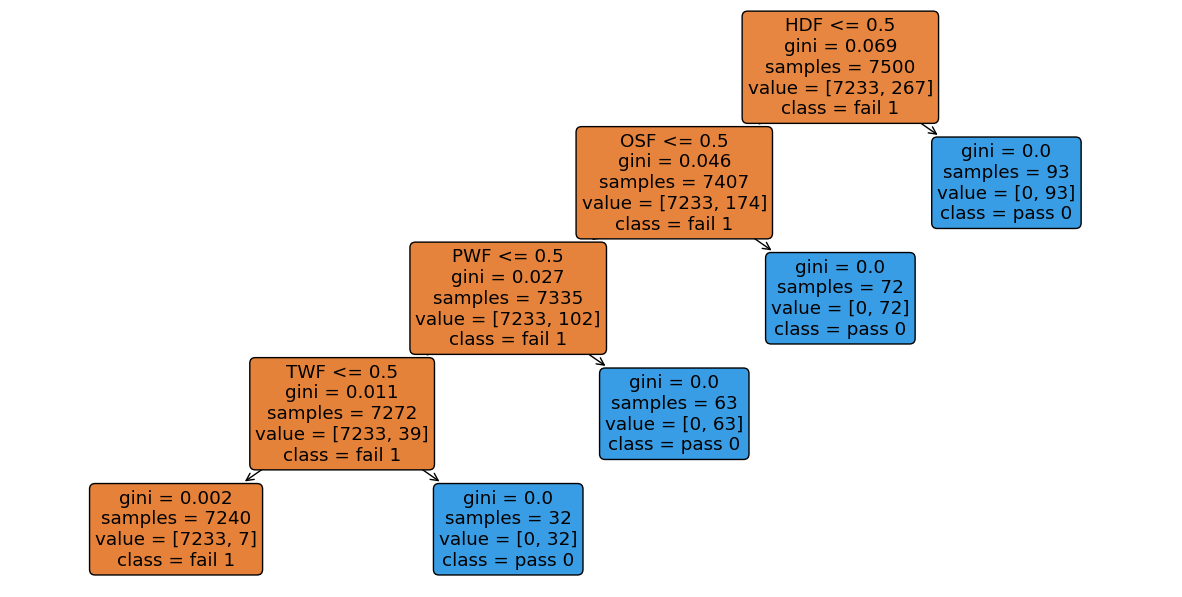

In [68]:
plt.figure(figsize=(15,7.5))
plot_tree(final_dt, filled=True, rounded=True, class_names=['fail 1', 'pass 0'], feature_names=X.columns)

In [49]:
# final decision tree accuracy after pruning
res = final_dt.predict(X_test)
score = accuracy_score(res, y_test)
print('Decision Tree Accuracy:', score)


Decision Tree Accuracy: 0.9992


Pruning tree to find the best hyperparameter values 

In [50]:
grid = {
    'criterion':  ['gini', 'entropy'],
    'max_depth': range(1,4),
    'min_samples_split': range(2,5),
    'splitter': ['best', 'random'],
    'min_samples_leaf': range(1,5)
}
clf = DecisionTreeClassifier(random_state=0)
grid_cv = GridSearchCV(clf, grid, scoring="roc_auc", n_jobs=-1, cv=3, verbose=1)
grid_cv.fit(X_train, y_train)
best_param = grid_cv.best_params_
best_param

Fitting 3 folds for each of 144 candidates, totalling 432 fits


{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

[Text(0.6666666666666666, 0.875, 'HDF <= 0.5\ngini = 0.069\nsamples = 7500\nvalue = [7233, 267]\nclass = 1'),
 Text(0.5, 0.625, 'OSF <= 0.5\ngini = 0.046\nsamples = 7407\nvalue = [7233, 174]\nclass = 1'),
 Text(0.3333333333333333, 0.375, 'PWF <= 0.5\ngini = 0.027\nsamples = 7335\nvalue = [7233, 102]\nclass = 1'),
 Text(0.16666666666666666, 0.125, 'gini = 0.011\nsamples = 7272\nvalue = [7233, 39]\nclass = 1'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 63\nvalue = [0, 63]\nclass = 0'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 72\nvalue = [0, 72]\nclass = 0'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 93\nvalue = [0, 93]\nclass = 0')]

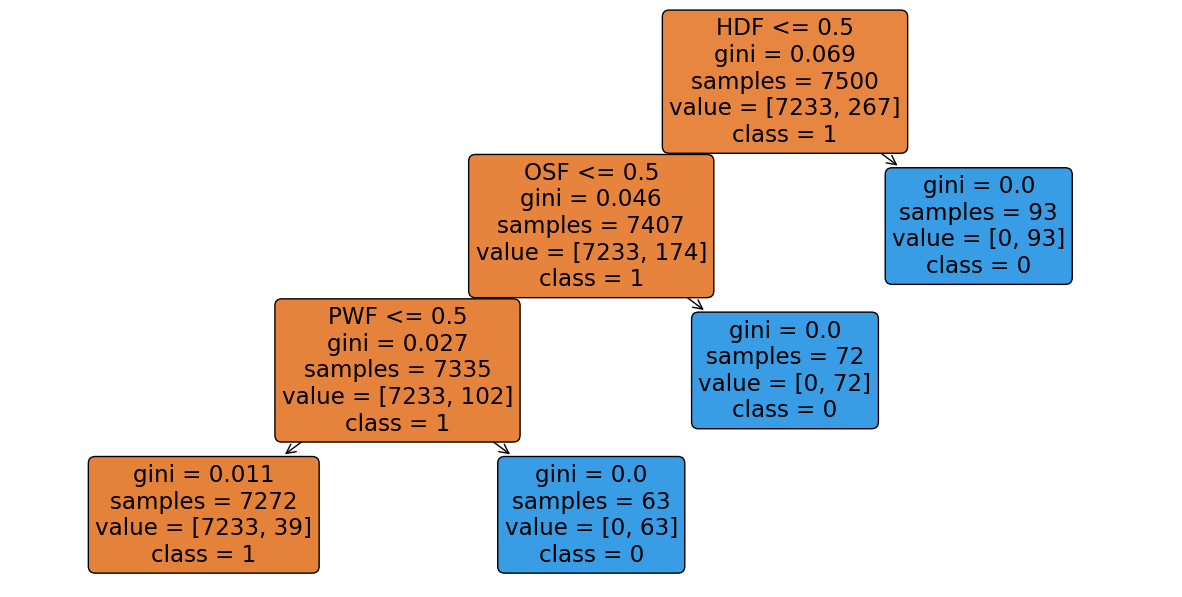

In [51]:

new_dtree = DecisionTreeClassifier(criterion=best_param['criterion'], max_depth=best_param['max_depth'],min_samples_leaf=best_param['min_samples_leaf'],
    min_samples_split=best_param['min_samples_split'],splitter=best_param['splitter'])
new_dtree.fit(X_train, y_train)
plt.figure(figsize=(15,7.5))
plot_tree(new_dtree, filled=True, rounded=True, class_names=['1', '0'], feature_names=X.columns)

In [52]:
res = new_dtree.predict(X_test)
score = accuracy_score(res, y_test)
print('Decision Tree Accuracy:', score)

Decision Tree Accuracy: 0.9948


Can we strengthen this classifier by boosting? Using gradient boosting technique to see if we can improve accuracy

In [53]:
import xgboost

estimator = xgboost.XGBClassifier(nthread=4,seed=42)
# hyper params tuning
parameters = {
    'max_depth': range (2, 5, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(estimator=estimator,param_grid=parameters,scoring = 'roc_auc',n_jobs = 10,verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 5),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=True)

In [54]:
print(grid_search.best_params_)
xgtree = grid_search.best_estimator_
res = xgtree.predict(X_test)
score = accuracy_score(res, y_test)
print('Decision Tree Accuracy:', score)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 140}
Decision Tree Accuracy: 0.9992


### SHAP Explainer

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import seaborn as sns

from omnixai.data.tabular import Tabular
from omnixai.preprocessing.tabular import TabularTransform
from omnixai.explainers.tabular import ShapTabular, LimeTabular, TabularExplainer
from omnixai.visualization.dashboard import Dashboard

In [56]:
data = pd.read_csv('ai4i2020.csv')
data.columns =  data.columns.str.replace(' ','_')
data.columns =  data.columns.str.replace(r'\[','', regex=True)
data.columns =  data.columns.str.replace(r'\]','', regex=True)
data.head()
data.columns

Index(['UDI', 'Product_ID', 'Type', 'Air_temperature_K',
       'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm',
       'Tool_wear_min', 'Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [57]:
processed_data = data.drop(['UDI', 'Product_ID'], axis=1).copy()
processed_data

,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [58]:
feature_names = list(processed_data.columns)
print(feature_names)
tabular_data = Tabular(
    data=processed_data,
    categorical_columns=['Type'],
    target_column='Machine_failure'
)
tabular_data

['Type', 'Air_temperature_K', 'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min', 'Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


     Type  Air_temperature_K  Process_temperature_K  Rotational_speed_rpm  \
0       M              298.1                  308.6                  1551   
1       L              298.2                  308.7                  1408   
2       L              298.1                  308.5                  1498   
3       L              298.2                  308.6                  1433   
4       L              298.2                  308.7                  1408   
...   ...                ...                    ...                   ...   
9995    M              298.8                  308.4                  1604   
9996    H              298.9                  308.4                  1632   
9997    M              299.0                  308.6                  1645   
9998    H              299.0                  308.7                  1408   
9999    M              299.0                  308.7                  1500   

      Torque_Nm  Tool_wear_min  Machine_failure  TWF  HDF  PWF  OSF  RNF  


In [59]:
np.random.seed(1)
transformer = TabularTransform().fit(tabular_data)
class_names = transformer.class_names
x = transformer.transform(tabular_data)
train, test, train_labels, test_labels = train_test_split(x[:, :-1], x[:, -1], train_size=0.80)
print('Training data shape: {}'.format(train.shape))
print('Test data shape:     {}'.format(test.shape))
train_data = transformer.invert(train)
test_data = transformer.invert(test)


Training data shape: (8000, 13)
Test data shape:     (2000, 13)


In [60]:
gbtree = DecisionTreeClassifier( max_depth=7)
gbtree.fit(train, train_labels)
print('Test accuracy: {}'.format(accuracy_score(test_labels, gbtree.predict(test))))

Test accuracy: 0.9995


In [61]:
preprocess = lambda z: transformer.transform(z)


In [62]:
explainers = TabularExplainer(
    explainers=["lime", "shap", "mace", "pdp", "ale"],
    mode="classification",
    data=train_data,
    model=gbtree,
    preprocess=preprocess,
    params={
        "lime": {"kernel_width": 3},
        "shap": {"nsamples": 100},
        "mace": {"ignored_features": ["UDI", "Product_ID"]}
    }
)
# Generate explanations
test_instances = test_data[1653:1680]
local_explanations = explainers.explain(X=test_instances)
global_explanations = explainers.explain_global(
    params={"pdp": {"features": ['Type', 'Air_temperature_K', 'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']}}
)
test_instances

  0%|          | 0/27 [00:00<?, ?it/s]

c:\Users\029405322\Desktop\playground\python\ai-mid\lib\site-packages\shap\utils\_legacy.py:231: RuntimeWarning:

invalid value encountered in log

c:\Users\029405322\Desktop\playground\python\ai-mid\lib\site-packages\shap\utils\_legacy.py:231: RuntimeWarning:

divide by zero encountered in double_scalars

c:\Users\029405322\Desktop\playground\python\ai-mid\lib\site-packages\shap\explainers\_kernel.py:575: RuntimeWarning:

invalid value encountered in multiply

c:\Users\029405322\Desktop\playground\python\ai-mid\lib\site-packages\shap\utils\_legacy.py:231: RuntimeWarning:

divide by zero encountered in log

c:\Users\029405322\Desktop\playground\python\ai-mid\lib\site-packages\shap\explainers\_kernel.py:575: RuntimeWarning:

invalid value encountered in subtract

c:\Users\029405322\Desktop\playground\python\ai-mid\lib\site-packages\shap\utils\_legacy.py:231: RuntimeWarning:

divide by zero encountered in log

c:\Users\029405322\Desktop\playground\python\ai-mid\lib\site-packages\shap\exp

     Type  Air_temperature_K  Process_temperature_K  Rotational_speed_rpm  \
1653    L              303.9                  312.9                1526.0   
1654    L              301.9                  309.9                1374.0   
1655    L              300.1                  310.6                1809.0   
1656    M              300.5                  309.9                1994.0   
1657    L              301.7                  311.0                1343.0   
1658    L              300.3                  309.2                1650.0   
1659    H              304.1                  313.3                1397.0   
1660    L              298.2                  308.2                1446.0   
1661    L              300.5                  310.8                1509.0   
1662    H              301.3                  310.4                1538.0   
1663    L              300.7                  311.0                1413.0   
1664    H              297.9                  307.8                1635.0   

In [63]:
index=1
print("LIME results:")
local_explanations["lime"].ipython_plot(index, class_names=class_names)
print("SHAP results:")
local_explanations["shap"].ipython_plot(index, class_names=class_names)
print("MACE results:")
local_explanations["mace"].ipython_plot(index, class_names=class_names)
print("PDP results:")
global_explanations["pdp"].ipython_plot(class_names=class_names)
print("ALE results:")
global_explanations["ale"].ipython_plot(class_names=class_names)



LIME results:


SHAP results:


MACE results:


PDP results:


ALE results:


In [64]:
from omnixai.explainers.prediction import PredictionAnalyzer

analyzer = PredictionAnalyzer(
    mode="classification",
    test_data=test_data,
    test_targets=test_labels,
    model=gbtree,
    preprocess=preprocess
)
prediction_explanations = analyzer.explain()

In [65]:
for name, metrics in prediction_explanations.items():
    print(f"{name}:")
    metrics.ipython_plot(class_names=class_names)

metric:


confusion_matrix:


roc:


precision_recall:


cumulative_gain:


lift_curve:


In [66]:
# Launch a dashboard for visualization
dashboard = Dashboard(
    instances=test_instances,
    local_explanations=local_explanations,
    global_explanations=global_explanations,
    prediction_explanations=prediction_explanations,
    class_names=class_names
)
dashboard.show()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app 'omnixai.visualization.dashboard'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
